In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv('loan.csv',low_memory=False)

In [3]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


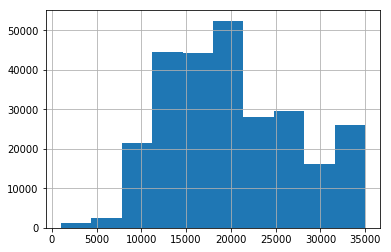

In [4]:
data.query('term==" 60 months"')['loan_amnt'].hist()

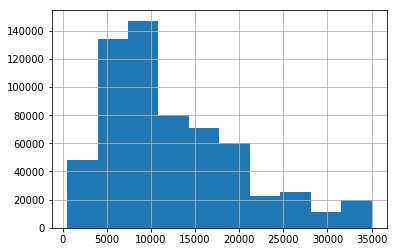

In [5]:
data.query('term==" 36 months"')["loan_amnt"].hist()

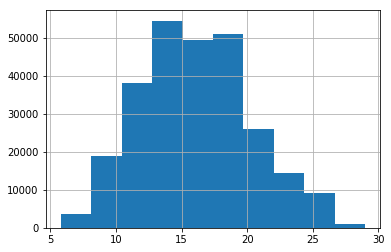

In [6]:
data.query('term==" 60 months"')['int_rate'].hist()

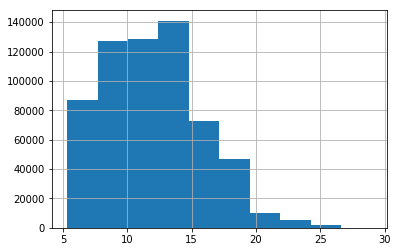

In [7]:
data.query('term==" 36 months"')['int_rate'].hist()

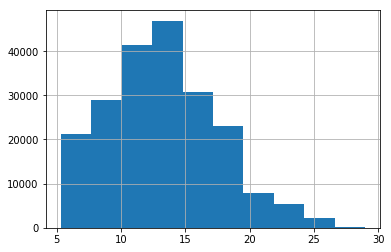

In [8]:
data.query('loan_status=="Fully Paid"')["int_rate"].hist()

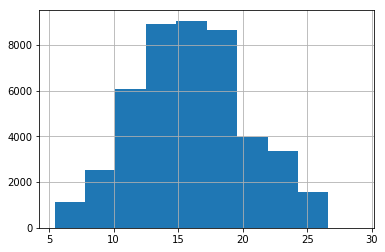

In [9]:
data.query('loan_status=="Charged Off"')["int_rate"].hist()

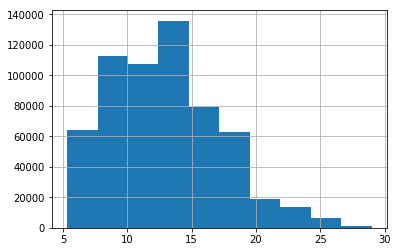

In [10]:
data.query('loan_status=="Current"')["int_rate"].hist()

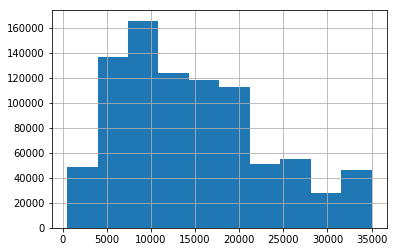

In [11]:
data['funded_amnt'].hist()

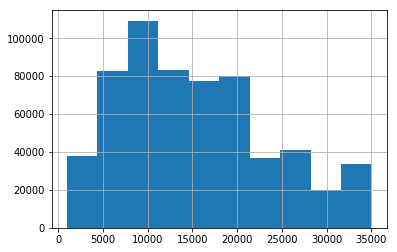

In [12]:
data.query('loan_status=="Current"')["loan_amnt"].hist()

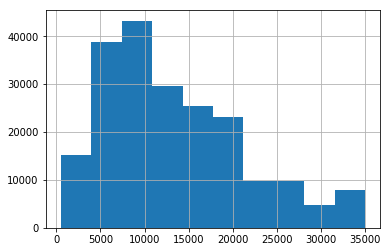

In [13]:
data.query('loan_status=="Fully Paid"')["loan_amnt"].hist()

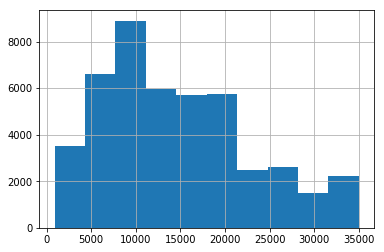

In [14]:
data.query('loan_status=="Charged Off"')["loan_amnt"].hist()

We can see that the distribution of loan amount is similar for both defaulters and non defaulters. Hence, loan amount might not be a good predictor of defaulters.

In [15]:
data['emp_length']=(data['emp_length'].replace(data['emp_length'].unique(),[11,0,1,3,8,9,4,5,6,2,7,'nan']))

In [16]:
a=np.array(data.query('loan_status=="Charged Off"').query('emp_length!="nan"')['emp_length'])

In [17]:
a=a.astype(int)

(array([ 6817.,  4033.,  3534.,  2775.,  3203.,  2695.,  2602.,  2154.,
         1777., 13133.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

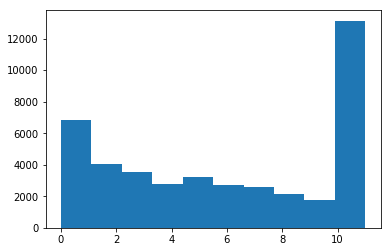

In [18]:
plt.hist(a)

In [19]:
a=np.array(data.query('loan_status=="Fully Paid"').query('emp_length!="nan"')['emp_length'])

In [20]:
a=a.astype(int)

(array([30925., 19528., 16846., 13422., 14856., 12058., 11483.,  9695.,
         7790., 63748.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

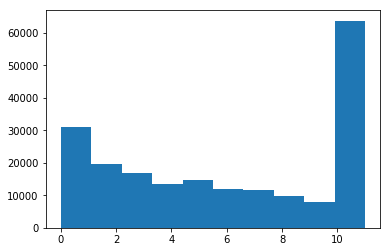

In [21]:
plt.hist(a)

In [22]:
a=np.array(data.query('loan_status=="Current"').query('emp_length!="nan"')['emp_length'])

In [23]:
a=a.astype(int)

(array([ 84526.,  52339.,  46908.,  34380.,  35676.,  26630.,  29048.,
         30499.,  23846., 204834.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

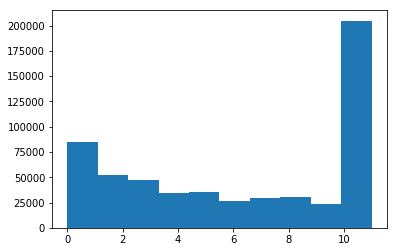

In [24]:
plt.hist(a)

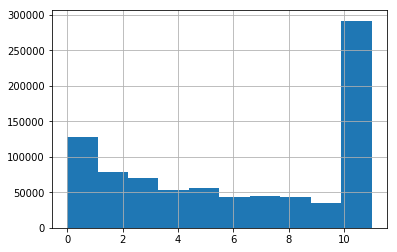

In [25]:
a=data.query('emp_length!="nan"')['emp_length'].astype(int).hist()

In [26]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [27]:
a=data.query('application_type=="INDIVIDUAL"')['loan_status'].value_counts()*100/len(data.query('application_type=="INDIVIDUAL"'))

In [28]:
b=data.query('application_type=="JOINT"')['loan_status'].value_counts()*100/len(data.query('application_type=="JOINT"'))

<BarContainer object of 5 artists>

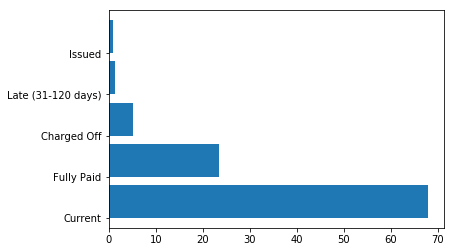

In [29]:
plt.barh(a.index[:-5],a.values[:-5],align='edge')

<BarContainer object of 5 artists>

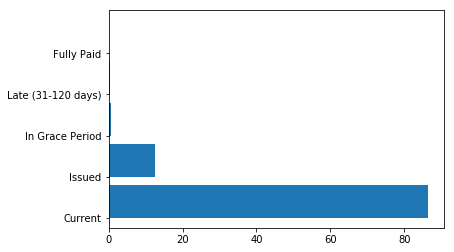

In [30]:
plt.barh(b.index,b.values,align='edge')

In [31]:
c=data.query('loan_status=="Fully Paid"')['grade'].value_counts()*100/len(data.query('loan_status=="Fully Paid"'))

<BarContainer object of 7 artists>

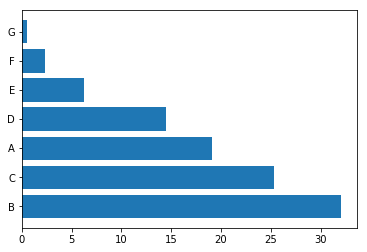

In [32]:
plt.barh(c.index,c.values)

In [33]:
d=data.query('loan_status=="Default"')['grade'].value_counts()

In [34]:
d/=len(d)

<BarContainer object of 7 artists>

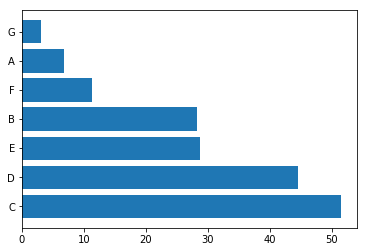

In [35]:
plt.barh(d.index,d.values)

In [36]:
data['loan_status'].value_counts()/data['loan_status'].count()*100

Current                                                67.815330
Fully Paid                                             23.408600
Charged Off                                             5.099061
Late (31-120 days)                                      1.306206
Issued                                                  0.953369
In Grace Period                                         0.704659
Late (16-30 days)                                       0.265614
Does not meet the credit policy. Status:Fully Paid      0.224031
Default                                                 0.137371
Does not meet the credit policy. Status:Charged Off     0.085758
Name: loan_status, dtype: float64

In [37]:
corr=data.corr()

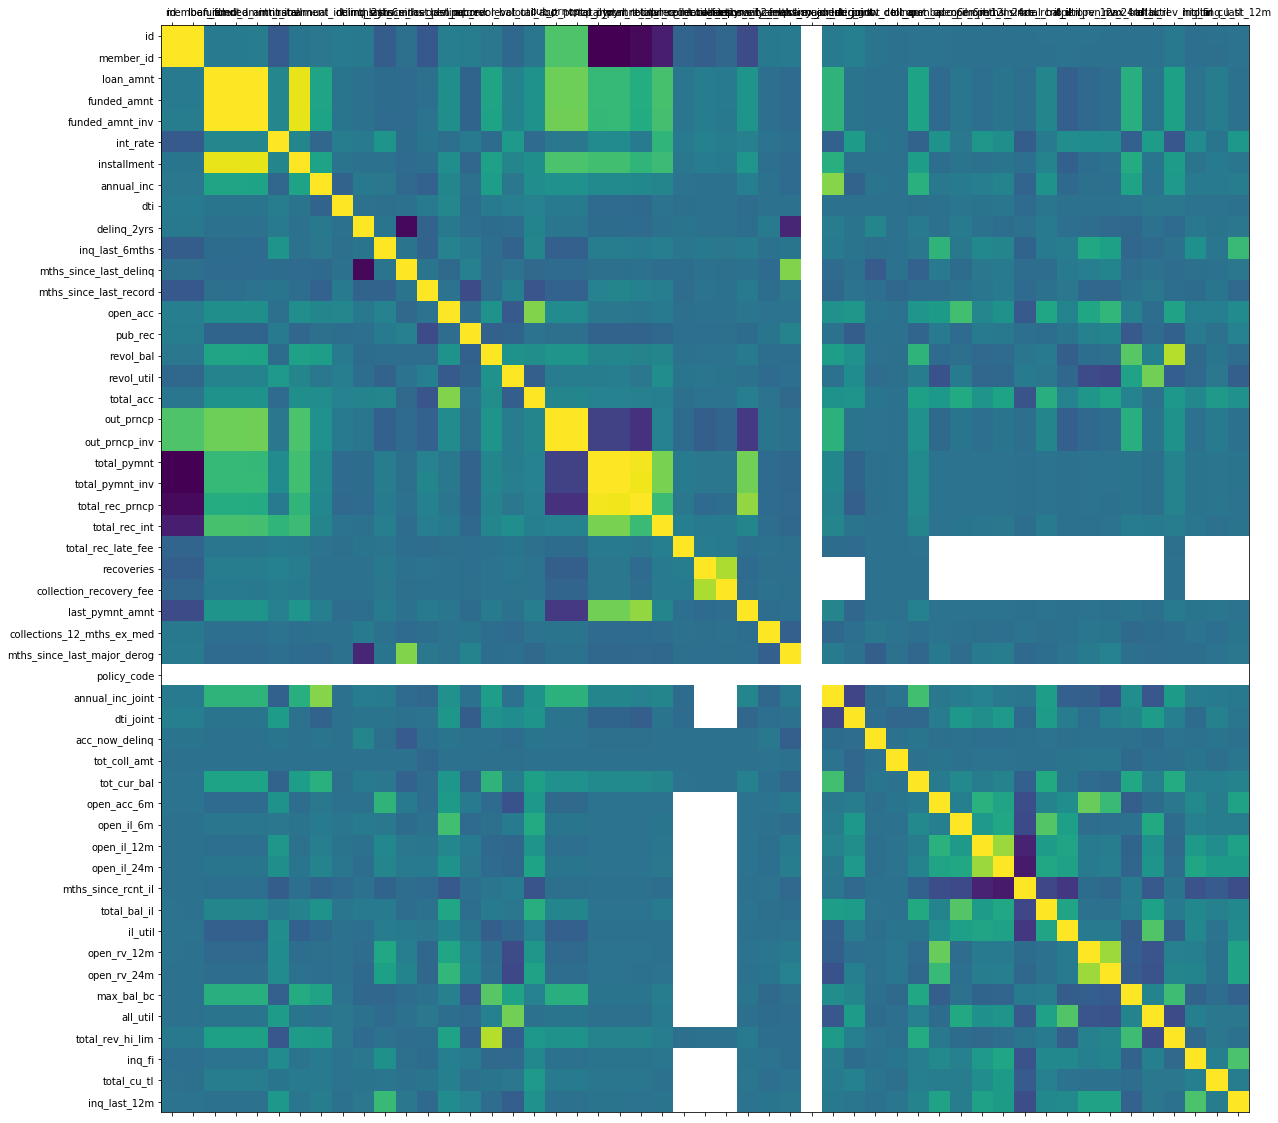

In [38]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

In [39]:
a=data.isnull().sum()*100/len(data)

In [40]:
to_drop=a[a>=30].index

In [41]:
data=data.drop(to_drop,axis=1)

In [42]:
data=data.drop('sub_grade',axis=1)

In [43]:
data=data.drop(['id','member_id'],axis=1)

In [44]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,NaN,11,RENT,...,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,Ryder,0,RENT,...,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,NaN,11,RENT,...,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,AIR RESOURCES BOARD,11,RENT,...,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,University Medical Group,1,RENT,...,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
5,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,Veolia Transportaton,3,RENT,...,161.03,NaN,Sep-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
6,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,Southern Star Photography,8,RENT,...,170.08,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
7,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,MKC Accounting,9,RENT,...,111.34,NaN,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
8,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,NaN,4,OWN,...,152.39,NaN,Aug-2012,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
9,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,Starbucks,0,RENT,...,121.45,NaN,Mar-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [45]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [46]:
to_drop=['issue_d','url','title','earliest_cr_line','next_pymnt_d','last_credit_pull_d','out_prncp_inv','total_pymnt_inv', 'total_rec_prncp']

In [47]:
data=data.drop(to_drop,axis=1)

In [48]:
data['term']=data['term'].replace({' 36 months':0,' 60 months':1})

In [49]:
data=data.drop(data.query('loan_status=="Current"').index)

In [50]:
data['application_type']=data['application_type'].replace({"INDIVIDUAL":0,"JOINT":1})

In [51]:
data['loan_status'].value_counts()*100/len(data)

Fully Paid                                             72.732143
Charged Off                                            15.843137
Late (31-120 days)                                      4.058473
Issued                                                  2.962185
In Grace Period                                         2.189426
Late (16-30 days)                                       0.825280
Does not meet the credit policy. Status:Fully Paid      0.696078
Default                                                 0.426821
Does not meet the credit policy. Status:Charged Off     0.266457
Name: loan_status, dtype: float64

In [52]:
data['loan_status']=data['loan_status'].replace({'Fully Paid':0,'Charged Off':1,'Default':1,'Does not meet the credit policy. Status:Charged Off':1,'Issued':0,'In Grace Period':0,'Does not meet the credit policy. Status:Fully Paid':0,'Late (31-120 days)':1,'Late (16-30 days)':1})

In [53]:
data['loan_status'].value_counts()

0    224424
1     61176
Name: loan_status, dtype: int64

In [54]:
data=pd.concat([pd.get_dummies(data['grade']),data],axis=1)

In [55]:
data=data.drop('grade',axis=1)

In [56]:
data=data.drop('last_pymnt_d',axis=1)

In [57]:
data

,A,B,C,D,E,F,G,loan_amnt,funded_amnt,funded_amnt_inv,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1,0,0,0,0,0,5000.0,5000.0,4975.000000,...,0.00,0.0000,171.62,0.0,1.0,0,0.0,NaN,NaN,NaN
1,0,0,1,0,0,0,0,2500.0,2500.0,2500.000000,...,117.08,1.1100,119.66,0.0,1.0,0,0.0,NaN,NaN,NaN
2,0,0,1,0,0,0,0,2400.0,2400.0,2400.000000,...,0.00,0.0000,649.91,0.0,1.0,0,0.0,NaN,NaN,NaN
3,0,0,1,0,0,0,0,10000.0,10000.0,10000.000000,...,0.00,0.0000,357.48,0.0,1.0,0,0.0,NaN,NaN,NaN
5,1,0,0,0,0,0,0,5000.0,5000.0,5000.000000,...,0.00,0.0000,161.03,0.0,1.0,0,0.0,NaN,NaN,NaN
7,0,0,0,0,1,0,0,3000.0,3000.0,3000.000000,...,0.00,0.0000,111.34,0.0,1.0,0,0.0,NaN,NaN,NaN
8,0,0,0,0,0,1,0,5600.0,5600.0,5600.000000,...,189.06,2.0900,152.39,0.0,1.0,0,0.0,NaN,NaN,NaN
9,0,1,0,0,0,0,0,5375.0,5375.0,5350.000000,...,269.29,2.5200,121.45,0.0,1.0,0,0.0,NaN,NaN,NaN
10,0,0,1,0,0,0,0,6500.0,6500.0,6500.000000,...,0.00,0.0000,1655.54,0.0,1.0,0,0.0,NaN,NaN,NaN
11,0,1,0,0,0,0,0,12000.0,12000.0,12000.000000,...,0.00,0.0000,6315.30,0.0,1.0,0,0.0,NaN,NaN,NaN


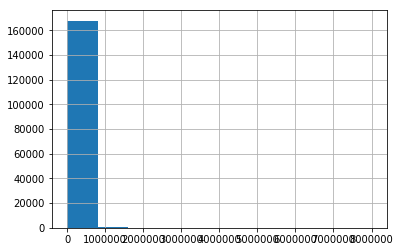

In [58]:
data[data['loan_status']==0]['tot_cur_bal'].hist()

In [59]:
data=pd.concat([pd.get_dummies(data['home_ownership']),data],axis=1)

In [60]:
data=pd.concat([pd.get_dummies(data['purpose']),data],axis=1)

In [61]:
data=data.drop('zip_code',axis=1)

In [62]:
data=pd.concat([pd.get_dummies(data['verification_status']),data],axis=1)

In [63]:
data=data.drop(['verification_status','home_ownership','policy_code','funded_amnt_inv','loan_amnt'],axis=1)

In [64]:
data.columns

Index(['Not Verified', 'Source Verified', 'Verified', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'ANY', 'MORTGAGE', 'NONE',
       'OTHER', 'OWN', 'RENT', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'funded_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'emp_length', 'annual_inc', 'loan_status', 'pymnt_plan', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [65]:
data=data.drop('emp_title',axis=1)

In [66]:
data['tot_coll_amt'].isna().sum()/len(data)*100

23.35049019607843

In [67]:
data=data.dropna()

In [68]:
target=data.pop('loan_status')

In [69]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

In [70]:
clf1=LogisticRegression(penalty='l1')

In [71]:
data.columns

Index(['Not Verified', 'Source Verified', 'Verified', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'ANY', 'MORTGAGE', 'NONE',
       'OTHER', 'OWN', 'RENT', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'funded_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [72]:
for i in data.columns:
    print(data[i].head())

42538    0
42544    0
42546    0
42549    0
42550    1
Name: Not Verified, dtype: uint8
42538    1
42544    0
42546    1
42549    0
42550    0
Name: Source Verified, dtype: uint8
42538    0
42544    1
42546    0
42549    1
42550    0
Name: Verified, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    0
Name: car, dtype: uint8
42538    0
42544    0
42546    0
42549    1
42550    0
Name: credit_card, dtype: uint8
42538    1
42544    1
42546    1
42549    0
42550    1
Name: debt_consolidation, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    0
Name: educational, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    0
Name: home_improvement, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    0
Name: house, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    0
Name: major_purchase, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    0
Name: medical, dtype: uint8
42538    0
42544    0
42546    0
42549    0


In [73]:
non_cat=['initial_list_status','addr_state','pymnt_plan']

In [74]:
data=data.drop('purpose',axis=1)

In [75]:
data['initial_list_status'].value_counts()

f    130270
w     88505
Name: initial_list_status, dtype: int64

In [76]:
data['initial_list_status']=data['initial_list_status'].replace({'f':1,'w':0})

In [77]:
(data['addr_state'].value_counts())

CA    35852
NY    17832
TX    17039
FL    14922
NJ     7941
IL     7794
PA     7126
GA     6850
OH     6771
VA     6752
NC     6354
MI     5490
AZ     5340
MD     5207
WA     5112
CO     4931
MA     4880
MN     3989
NV     3459
MO     3347
IN     3241
CT     2983
OR     2929
TN     2909
AL     2866
WI     2679
LA     2588
SC     2446
KY     1999
OK     1959
UT     1867
KS     1803
AR     1538
HI     1364
NM     1246
WV     1007
NH      990
RI      915
MT      661
DE      580
AK      579
DC      569
MS      564
WY      510
SD      484
VT      352
NE       79
ME       44
ND       35
IA        1
Name: addr_state, dtype: int64

In [78]:
data.columns

Index(['Not Verified', 'Source Verified', 'Verified', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'ANY', 'MORTGAGE', 'NONE',
       'OTHER', 'OWN', 'RENT', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'funded_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'pymnt_plan', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'total_pymnt',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [79]:
redund=['Source Verified','other','NONE','G']

In [80]:
data=data.drop(redund,axis=1)

In [81]:
data.columns

Index(['Not Verified', 'Verified', 'car', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'renewable_energy', 'small_business', 'vacation', 'wedding',
       'ANY', 'MORTGAGE', 'OTHER', 'OWN', 'RENT', 'A', 'B', 'C', 'D', 'E', 'F',
       'funded_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'pymnt_plan', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'total_pymnt',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [82]:
data['pymnt_plan'].value_counts()

n    218772
y         3
Name: pymnt_plan, dtype: int64

In [83]:
data=data.drop('pymnt_plan',axis=1)

In [84]:
data['emp_length'].value_counts()

11     71008
2      19475
3      16941
0      16803
5      14386
1      13875
4      12565
7      12340
6      12190
8      10832
nan     9762
9       8598
Name: emp_length, dtype: int64

In [85]:
len(data[data['emp_length']=='nan'])/len(data)*100

4.462118615015427

In [86]:
data=data.drop(data[data['emp_length']=='nan'].index)

In [87]:
data

,Not Verified,Verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42538,0,0,0,0,1,0,0,0,0,0,...,0.00,0.00,0.0000,119.17,0.0,0,0.0,15386.0,13605.0,8100.0
42544,0,1,0,0,1,0,0,0,0,0,...,0.00,0.00,0.0000,2677.23,0.0,0,0.0,154.0,19530.0,5300.0
42546,0,0,0,0,1,0,0,0,0,0,...,0.00,0.00,0.0000,23915.86,0.0,0,0.0,0.0,799592.0,54200.0
42549,0,1,0,1,0,0,0,0,0,0,...,0.00,0.00,0.0000,10726.61,0.0,0,0.0,539.0,199834.0,28200.0
42550,1,0,0,0,1,0,0,0,0,0,...,15.00,0.00,0.0000,276.88,0.0,0,0.0,0.0,15949.0,20800.0
42551,0,1,0,0,1,0,0,0,0,0,...,0.00,0.00,0.0000,323.54,0.0,0,0.0,92.0,24724.0,14100.0
42552,1,0,0,0,1,0,0,0,0,0,...,0.00,0.00,0.0000,14150.76,0.0,0,0.0,0.0,13038.0,25800.0
42554,0,0,0,0,0,0,1,0,0,0,...,0.00,0.00,0.0000,3900.48,0.0,0,0.0,0.0,4136.0,25700.0
42555,0,1,0,0,1,0,0,0,0,0,...,0.00,0.00,0.0000,13334.93,0.0,0,0.0,0.0,23473.0,43100.0
42557,1,0,0,0,1,0,0,0,0,0,...,0.00,0.00,0.0000,4395.33,0.0,0,0.0,0.0,50865.0,19100.0


In [88]:
pd.get_dummies(data['addr_state'])

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
42538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42544,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42546,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42550,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42551,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42554,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
42555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
data=pd.concat([pd.get_dummies(data['addr_state']),data],axis=1)
data=data.drop(['addr_state','IA'],axis=1)

In [90]:
data

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42538,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0000,119.17,0.0,0,0.0,15386.0,13605.0,8100.0
42544,0,0,0,0,0,0,0,0,0,1,...,0.00,0.00,0.0000,2677.23,0.0,0,0.0,154.0,19530.0,5300.0
42546,0,0,0,0,1,0,0,0,0,0,...,0.00,0.00,0.0000,23915.86,0.0,0,0.0,0.0,799592.0,54200.0
42549,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0000,10726.61,0.0,0,0.0,539.0,199834.0,28200.0
42550,0,0,0,0,0,1,0,0,0,0,...,15.00,0.00,0.0000,276.88,0.0,0,0.0,0.0,15949.0,20800.0
42551,0,0,0,0,1,0,0,0,0,0,...,0.00,0.00,0.0000,323.54,0.0,0,0.0,92.0,24724.0,14100.0
42552,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0000,14150.76,0.0,0,0.0,0.0,13038.0,25800.0
42554,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0000,3900.48,0.0,0,0.0,0.0,4136.0,25700.0
42555,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0000,13334.93,0.0,0,0.0,0.0,23473.0,43100.0
42557,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0000,4395.33,0.0,0,0.0,0.0,50865.0,19100.0


In [91]:
for i in data.columns:
    print(data[i].head())

42538    0
42544    0
42546    0
42549    0
42550    0
Name: AK, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    0
Name: AL, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    0
Name: AR, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    0
Name: AZ, dtype: uint8
42538    0
42544    0
42546    1
42549    0
42550    0
Name: CA, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    1
Name: CO, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    0
Name: CT, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    0
Name: DC, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    0
Name: DE, dtype: uint8
42538    0
42544    1
42546    0
42549    0
42550    0
Name: FL, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    0
Name: GA, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    0
Name: HI, dtype: uint8
42538    0
42544    0
42546    0
42549    0
42550    0
Name: IL,

In [92]:
target=target[data.index]

In [93]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=2)

In [94]:
clf1=LogisticRegression()

In [95]:
clf1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [308]:
confusion_matrix(y_test,clf1.predict(x_test))

array([[52664,   690],
       [ 3404, 12217]], dtype=int64)

In [97]:
(690+3404)/len(x_test)*100

5.935483870967742

In [98]:
print(classification_report(y_test,clf1.predict(x_test)))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96     53354
          1       0.95      0.78      0.86     15621

avg / total       0.94      0.94      0.94     68975



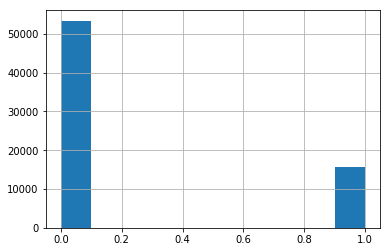

In [99]:
y_test.hist()

(array([56068.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12907.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

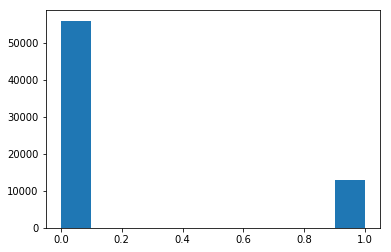

In [100]:
plt.hist(clf1.predict(x_test))

In [309]:
fpr, tpr, thresholds = roc_curve(y_test,clf1.predict(x_test))

In [310]:
roc_auc = auc(fpr, tpr)

In [311]:
roc_auc

0.8845778629611445

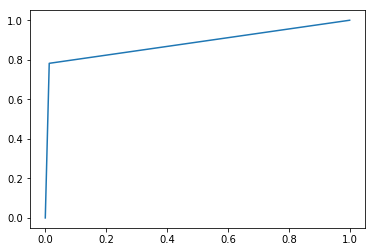

In [103]:
plt.plot(fpr, tpr)

In [104]:
clf2=RandomForestClassifier(n_estimators=100,oob_score=True)

In [105]:
clf2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [106]:
confusion_matrix(y_test,clf2.predict(x_test))

array([[51573,  1781],
       [  629, 14992]], dtype=int64)

In [107]:
(1777+630)/len(x_test)*100

3.4896701703515767

In [108]:
print(classification_report(y_test,clf2.predict(x_test)))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98     53354
          1       0.89      0.96      0.93     15621

avg / total       0.97      0.97      0.97     68975



In [109]:
fpr, tpr, thresholds = roc_curve(y_test,clf2.predict(x_test))

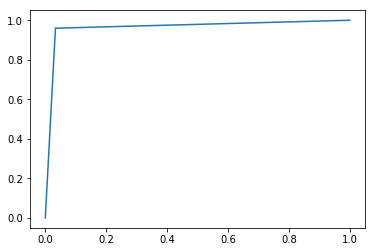

In [110]:
plt.plot(fpr, tpr)

In [111]:
roc_auc = auc(fpr, tpr)

In [112]:
roc_auc

0.9631764384454472

In [113]:
data

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42538,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0000,119.17,0.0,0,0.0,15386.0,13605.0,8100.0
42544,0,0,0,0,0,0,0,0,0,1,...,0.00,0.00,0.0000,2677.23,0.0,0,0.0,154.0,19530.0,5300.0
42546,0,0,0,0,1,0,0,0,0,0,...,0.00,0.00,0.0000,23915.86,0.0,0,0.0,0.0,799592.0,54200.0
42549,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0000,10726.61,0.0,0,0.0,539.0,199834.0,28200.0
42550,0,0,0,0,0,1,0,0,0,0,...,15.00,0.00,0.0000,276.88,0.0,0,0.0,0.0,15949.0,20800.0
42551,0,0,0,0,1,0,0,0,0,0,...,0.00,0.00,0.0000,323.54,0.0,0,0.0,92.0,24724.0,14100.0
42552,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0000,14150.76,0.0,0,0.0,0.0,13038.0,25800.0
42554,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0000,3900.48,0.0,0,0.0,0.0,4136.0,25700.0
42555,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0000,13334.93,0.0,0,0.0,0.0,23473.0,43100.0
42557,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0000,4395.33,0.0,0,0.0,0.0,50865.0,19100.0


In [114]:
corr=data.corr()

In [115]:
corr=np.matrix(corr)

In [116]:
corr=corr[75:][:75]

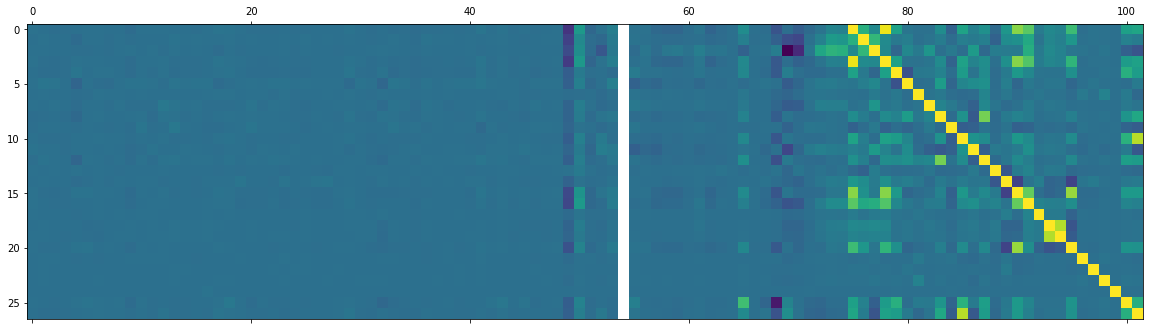

In [117]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(corr)


In [316]:
clf3=AdaBoostClassifier(n_estimators=500,learning_rate=1)

In [317]:
clf3.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=500, random_state=None)

In [318]:
confusion_matrix(y_test,clf3.predict(x_test))

array([[51731,  1623],
       [  971, 14650]], dtype=int64)

In [121]:
(1623+971)/len(x_test)*100

3.7607828923523017

In [319]:
print(classification_report(y_test,clf3.predict(x_test)))

             precision    recall  f1-score   support

          0       0.98      0.97      0.98     53354
          1       0.90      0.94      0.92     15621

avg / total       0.96      0.96      0.96     68975



In [312]:
fpr, tpr, thresholds = roc_curve(y_test,clf3.predict(x_test))

In [313]:
roc_auc = auc(fpr, tpr)

In [314]:
roc_auc

0.9537103123019953

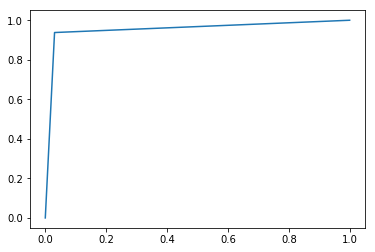

In [315]:
plt.plot(fpr, tpr)

In [122]:
clf4=xgb.XGBClassifier(n_estimators=300)

In [123]:
x_test['emp_length']=x_test['emp_length'].astype(int)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
x_train['emp_length']=x_train['emp_length'].astype(int)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
clf4.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [126]:
confusion_matrix(y_test,clf4.predict(x_test))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[51571,  1783],
       [  405, 15216]], dtype=int64)

In [127]:
(1783+405)/len(x_test)*100

3.1721638274737223

In [320]:
fpr, tpr, thresholds = roc_curve(y_test,clf4.predict(x_test))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [321]:
roc_auc = auc(fpr, tpr)

In [322]:
roc_auc

0.9703275311861399

In [324]:
print(classification_report(y_test,clf4.predict(x_test)))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98     53354
          1       0.90      0.97      0.93     15621

avg / total       0.97      0.97      0.97     68975



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


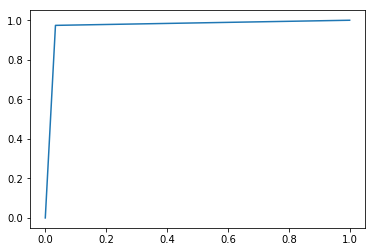

In [323]:
plt.plot(fpr,tpr)

In [325]:
clf5=LGBMClassifier(n_estimators=150,reg_lambda=0.5)

In [329]:
grid=GridSearchCV(clf5,{'reg_lambda':np.linspace(0,1,10)},cv=5)

In [331]:
grid.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=150, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.5, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reg_lambda': array([0.     , 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667,
       0.77778, 0.88889, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [333]:
grid.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=150, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=1.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [334]:
clf5=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=150, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=1.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [335]:
clf5.fit(x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=150, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=1.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [336]:
confusion_matrix(y_test,clf5.predict(x_test))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[51585,  1769],
       [  351, 15270]], dtype=int64)

In [337]:
(1769+351)/len(x_test)*100

3.0735773831098223

In [338]:
print(classification_report(y_test,clf5.predict(x_test)))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98     53354
          1       0.90      0.98      0.94     15621

avg / total       0.97      0.97      0.97     68975



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [133]:
fpr, tpr, thresholds = roc_curve(y_test,clf5.predict(x_test))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [134]:
roc_auc = auc(fpr, tpr)

In [135]:
roc_auc

0.9731528959309523

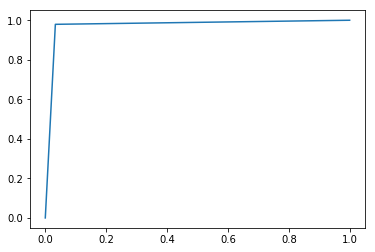

In [136]:
plt.plot(fpr,tpr)

In [283]:
clf6 = LinearSVC(dual=False,C=0.4)

In [292]:
grid= GridSearchCV(clf6,{'C':np.linspace(0.2,0.4,50)}, cv=5)

In [293]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=0.4, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([0.2    , 0.20408, 0.20816, 0.21224, 0.21633, 0.22041, 0.22449,
       0.22857, 0.23265, 0.23673, 0.24082, 0.2449 , 0.24898, 0.25306,
       0.25714, 0.26122, 0.26531, 0.26939, 0.27347, 0.27755, 0.28163,
       0.28571, 0.2898 , 0.29388, 0.29796, 0.30204, 0.30612, 0.3102 ,
   ...27, 0.36735,
       0.37143, 0.37551, 0.37959, 0.38367, 0.38776, 0.39184, 0.39592,
       0.4    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [294]:
grid.best_estimator_

LinearSVC(C=0.3591836734693878, class_weight=None, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [295]:
clf6=LinearSVC(C=0.3591836734693878, class_weight=None, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [296]:
clf6.fit(x_train,y_train)

LinearSVC(C=0.3591836734693878, class_weight=None, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [301]:
np.matrix(confusion_matrix(y_test,clf6.predict(x_test)))

matrix([[52814,   540],
        [ 3468, 12153]], dtype=int64)

In [298]:
(540+3468)/len(y_test)*100

5.8108010148604565

In [302]:
print(classification_report(y_test,clf6.predict(x_test)))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96     53354
          1       0.96      0.78      0.86     15621

avg / total       0.94      0.94      0.94     68975



In [304]:
fpr, tpr, thresholds = roc_curve(y_test,clf6.predict(x_test))

In [305]:
roc_auc = auc(fpr, tpr)

In [306]:
roc_auc

0.883935043828093

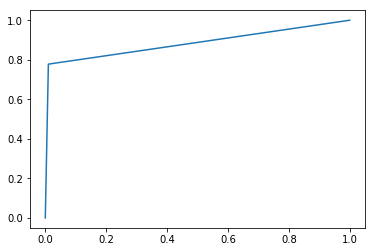

In [307]:
plt.plot(fpr,tpr)

In [141]:
pca=PCA()

In [142]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

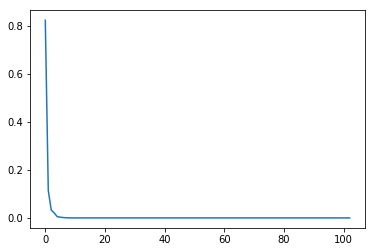

In [143]:
plt.plot([i for i in range(len(pca.explained_variance_ratio_))],pca.explained_variance_ratio_,)

In [144]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [145]:
pca1=PCA(n_components=10)

In [146]:
pca1.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [147]:
pca_x_train=pca1.fit_transform(x_train)

In [148]:
pca_x_test=pca1.fit_transform(x_test)

In [149]:
clf7=LGBMClassifier(n_estimators=150)

In [150]:
clf7.fit(pca_x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=150, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [151]:
confusion_matrix(y_test,clf7.predict(pca_x_test))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[35784, 17570],
       [11945,  3676]], dtype=int64)

In [152]:
(11945+17570)/len(x_test)*100

42.79086625588982

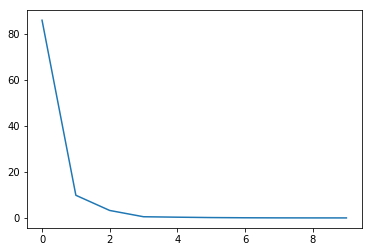

In [153]:
plt.plot(pca1.explained_variance_ratio_*100)

In [154]:
clf8=LinearDiscriminantAnalysis()

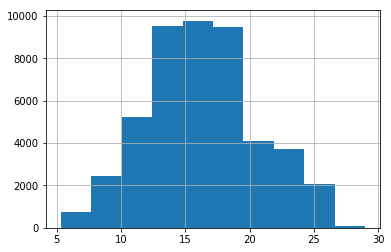

In [155]:
data['int_rate'][target[target==1].index].hist()

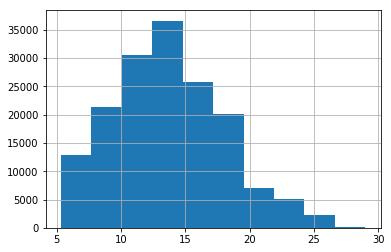

In [156]:
data['int_rate'][target[target==0].index].hist()

In [157]:
a=data['emp_length'][target[target==0].index].astype(int)

(array([23278., 15042., 13067.,  9719., 11107.,  9345.,  9499.,  8351.,
         6533., 55899.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

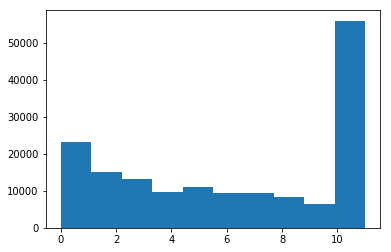

In [158]:
plt.hist(data['emp_length'][target[target==0].index].astype(int))

(array([ 7400.,  4433.,  3874.,  2846.,  3279.,  2845.,  2841.,  2481.,
         2065., 15109.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

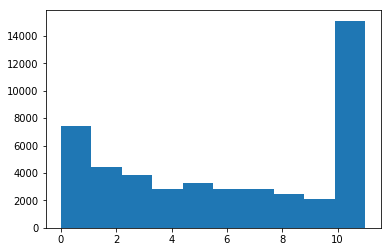

In [160]:
plt.hist(data['emp_length'][target[target==1].index].astype(int))

In [187]:
a=[data[i][target[target==1].index].astype(int).sum() for i in ["A","B","C","D",'E','F']]

In [188]:
a.append(len(target[target==1].index)-sum(a))

<BarContainer object of 7 artists>

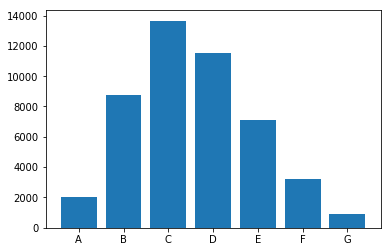

In [189]:
(plt.bar(['A','B','C','D','E','F','G'],a))

In [182]:
a=[data[i][target[target==0].index].astype(int).sum() for i in ["A","B","C","D",'E','F']]

In [183]:
a.append(len(target[target==0].index)-sum(a))

<BarContainer object of 7 artists>

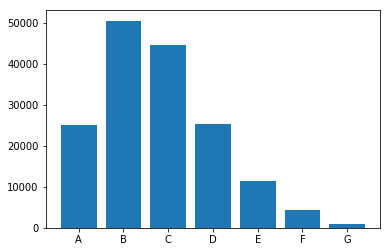

In [184]:
plt.bar(['A','B','C','D','E','F','G'],a)

In [191]:
scl=StandardScaler()

In [192]:
scl.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [194]:
norm_x_train=scl.fit_transform(x_train)

In [195]:
norm_x_train

array([[-5.18173204e-02, -1.15037303e-01, -8.40351303e-02, ...,
        -9.36083682e-03,  1.89376454e+00, -4.88186872e-01],
       [-5.18173204e-02, -1.15037303e-01, -8.40351303e-02, ...,
        -9.36083682e-03, -6.95258537e-01, -7.45302747e-01],
       [-5.18173204e-02, -1.15037303e-01, -8.40351303e-02, ...,
        -9.36083682e-03, -8.64745528e-01, -1.87090649e-01],
       ...,
       [-5.18173204e-02, -1.15037303e-01, -8.40351303e-02, ...,
        -9.36083682e-03, -6.61317625e-01, -1.05896162e-01],
       [-5.18173204e-02, -1.15037303e-01, -8.40351303e-02, ...,
        -9.36083682e-03, -5.18126152e-04,  1.37928633e+00],
       [-5.18173204e-02, -1.15037303e-01, -8.40351303e-02, ...,
         6.29971889e-01, -8.33857189e-01, -3.79927556e-01]])

In [196]:
norm_x_test=scl.fit_transform(x_test)

In [197]:
pca=PCA()

In [198]:
pca.fit(norm_x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

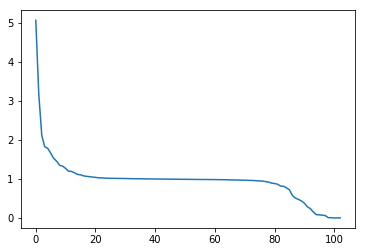

In [199]:
plt.plot(pca.explained_variance_ratio_*100)

In [200]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

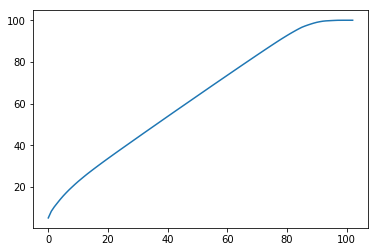

In [202]:
plt.plot(var1)

In [228]:
pca1=PCA(n_components=103)

In [229]:
pca1.fit(norm_x_train)

PCA(copy=True, iterated_power='auto', n_components=103, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [230]:
pca_x_train=pca1.fit_transform(norm_x_train)

In [231]:
pca_x_test=pca1.fit_transform(norm_x_test)

In [243]:
clf9=LGBMClassifier(n_estimators=150,reg_lambda=0)

In [244]:
clf9.fit(norm_x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=150, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [248]:
confusion_matrix(y_test,clf9.predict(norm_x_test))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[50761,  2593],
       [  231, 15390]], dtype=int64)

In [246]:
(2593+231)/len(y_test)*100

4.094237042406669

In [216]:
clf=LogisticRegression()

In [217]:
clf.fit(pca_x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [218]:
confusion_matrix(y_test,clf.predict(pca_x_test))

array([[37753, 15601],
       [ 6022,  9599]], dtype=int64)

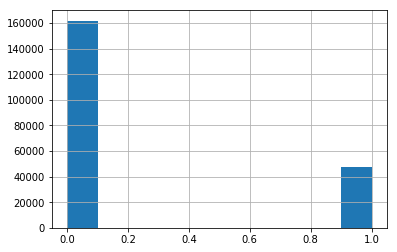

In [339]:
target.hist()

In [340]:
clf5

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=150, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=1.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

(array([53354.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 15621.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

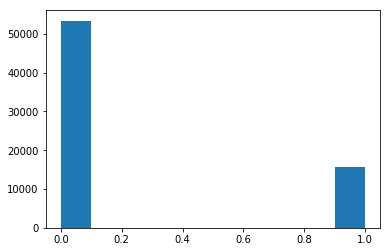

In [347]:
plt.hist(y_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


(array([51936.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 17039.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

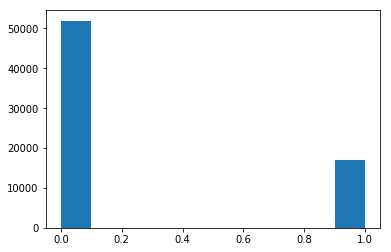

In [346]:
plt.hist(clf5.predict(x_test))